# 앙상블(Ensemble)

## Bagging meta-estimator

In [217]:
import warnings
warnings.filterwarnings("ignore")

In [218]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_boston
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [220]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [221]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [222]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()
boston = load_boston()
diabetes = load_diabetes()

## Forests of randomized trees

- `sklearn.ensemble`
  - Random Forest
  - Extra-Trees

In [223]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

### RandomForestClassifier

```
params = {
    "random_state": SEED,
    "max_features" : "sqrt", # 몇개의 Feature로 학습 시킬지 None : 전체피쳐
    "n_estimators" : 10, # 트리 개수
    "max_depth" : 10,
    "min_samples_split" : 10,
    "min_samples_leaf" : 3,
}

```

In [229]:
base_model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [230]:
cross_val = cross_validate(
    estimator = base_model,
    X=iris.data, y = iris.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.06641554832458496
avg score time: 0.00478816032409668
avg test score: 0.96


In [231]:
base_model.fit(X=iris.data, y = iris.target)
base_model["randomforestclassifier"].feature_importances_ # 중요한 feature를 찾는다.

array([0.1062887 , 0.0239419 , 0.43017867, 0.43959073])

In [232]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [233]:
# wine dataset 을 학습시키고 중요한 feature 를 찾아보세요 

In [234]:
base_model = make_pipeline(StandardScaler(), RandomForestClassifier())

In [235]:
cross_val = cross_validate(estimator=base_model, X = wine.data, y = wine.target, cv = 5)

print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.07137908935546874
avg score time: 0.0048943042755126955
avg test score: 0.9777777777777779


In [236]:
base_model.fit(X = wine.data, y = wine.target)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [237]:
base_model["randomforestclassifier"].feature_importances_

# 와인 데이터는 어째 중요 feature가 없는 편

array([0.12320098, 0.0381284 , 0.01473808, 0.02574688, 0.03371739,
       0.06955849, 0.152828  , 0.00864984, 0.02701775, 0.16571798,
       0.08136195, 0.10464983, 0.15468443])

In [238]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

### Random Forests Regressor

In [74]:
base_model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [75]:
cross_val = cross_validate(
    estimator = base_model,
    X=boston.data, y = boston.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.18542375564575195
avg score time: 0.004896831512451172
avg test score: 0.6308607925412886


In [76]:
# diabetes dataset을 학습시켜 보세요 

In [77]:
base_model = make_pipeline(StandardScaler(), RandomForestRegressor())

In [78]:
cross_validate(estimator=base_model, X = diabetes.data, y = diabetes.target, cv =5)

print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.18542375564575195
avg score time: 0.004896831512451172
avg test score: 0.6308607925412886


In [79]:
base_model.fit(diabetes.data, diabetes.target)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [80]:
base_model['randomforestregressor'].feature_importances_

array([0.05571489, 0.01211912, 0.29079687, 0.09909001, 0.04257567,
       0.05770424, 0.05163215, 0.02213958, 0.29890321, 0.06932427])

In [81]:
diabetes.feature_names

# bmi랑 s5가 중요한 feature가 되는듯.

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

## AdaBoost
```
params = {
    'n_estimators' : [20, 22, 23, 24, 25], # 생성할 모델의 수 지정
    'learning_rate' : [0.4, 0.45, 0.5, 0.55, 0.6], # 학습률 지정
    'base_estimator__criterion' : ['gini', 'entropy'], # 트리의 학습방법 설정(엔트로피 or 지니)
    'base_estimator__max_features' : [7, 8], # 최대 피처 지정
    'base_estimator__max_depth' : [1, 2] # 부스팅 할 때 의 탐색 깊이

```

In [82]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

### AdaBoost 분류

In [239]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
)

In [240]:
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y = iris.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.031684350967407224
avg score time: 0.0032006263732910155
avg test score: 0.9466666666666667


In [241]:
# wine data

In [244]:
model = make_pipeline(StandardScaler(), AdaBoostClassifier())

In [245]:
cross_validate(estimator= model, X = wine.data, y = wine.target, cv = 5)

print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")


avg fit time: 0.031684350967407224
avg score time: 0.0032006263732910155
avg test score: 0.9466666666666667


In [246]:
model.fit(wine.data, wine.target)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier', AdaBoostClassifier())])

In [247]:
model['adaboostclassifier'].feature_importances_

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.48, 0.  , 0.  , 0.02, 0.24,
       0.22, 0.02])

In [248]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [249]:
# cancer data

In [91]:
model = make_pipeline(StandardScaler(), AdaBoostClassifier())

In [92]:
cross_validate(estimator= model, X = cancer.data, y = cancer.target, cv = 5)

print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.03214077949523926
avg score time: 0.0033483982086181642
avg test score: 0.9466666666666667


In [93]:
model.fit(cancer.data, cancer.target)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier', AdaBoostClassifier())])

In [94]:
model['adaboostclassifier'].feature_importances_

array([0.  , 0.1 , 0.  , 0.  , 0.04, 0.06, 0.02, 0.08, 0.  , 0.  , 0.02,
       0.02, 0.  , 0.1 , 0.  , 0.04, 0.  , 0.  , 0.04, 0.06, 0.02, 0.06,
       0.02, 0.08, 0.06, 0.02, 0.06, 0.06, 0.02, 0.02])

In [95]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### AdaBoost 회귀

In [96]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
)

In [97]:
cross_val = cross_validate(
    estimator = model,
    X=boston.data, y = boston.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.04819235801696777
avg score time: 0.0021455764770507814
avg test score: 0.573980675802228


In [98]:
# diabetes

In [111]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
)

In [112]:
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.04306879043579102
avg score time: 0.0020853996276855467
avg test score: 0.4002900236427262


In [113]:
model.fit(diabetes.data, diabetes.target)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostregressor', AdaBoostRegressor())])

In [114]:
model['adaboostregressor'].feature_importances_

array([0.0732181 , 0.00303434, 0.27955799, 0.08785749, 0.04765946,
       0.04298654, 0.0886776 , 0.01374511, 0.21986767, 0.14339569])

In [115]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

## Gradient Tree Boosting

In [155]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

### Gradient Tree Boosting 분류

In [250]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

In [251]:
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y = iris.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.09159798622131347
avg score time: 0.0005150794982910156
avg test score: 0.9666666666666668


In [252]:
# wine

In [254]:
model = make_pipeline(StandardScaler(), GradientBoostingClassifier())

In [255]:
cross_val = cross_validate(estimator= model, X = wine.data, y = wine.target, cv = 5)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.1646749496459961
avg score time: 0.0005614757537841797
avg test score: 0.9496825396825397


In [256]:
model.fit(wine.data, wine.target)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [257]:
model['gradientboostingclassifier'].feature_importances_

array([7.84205863e-03, 4.34918320e-02, 1.03560287e-02, 2.54668157e-03,
       4.97911667e-03, 1.93701417e-03, 1.97711322e-01, 8.70782381e-04,
       1.01512233e-07, 3.10047964e-01, 1.01532194e-02, 1.22367976e-01,
       2.87695904e-01])

In [258]:
# cancer

In [259]:
model = make_pipeline(StandardScaler(), GradientBoostingClassifier())

In [260]:
cross_val = cross_validate(estimator= model, X = cancer.data, y = cancer.target, cv = 5)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.2665387153625488
avg score time: 0.0005738735198974609
avg test score: 0.9596180717279925


### Gradient Tree Boosting 회귀

In [261]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
)

In [262]:
cross_val = cross_validate(
    estimator = model,
    X=boston.data, y = boston.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.06817846298217774
avg score time: 0.0004662990570068359
avg test score: 0.6734001783927274


In [263]:
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.04907040596008301
avg score time: 0.0005007266998291015
avg test score: 0.40748036150409506


## Extreme Gradient Boosting

```
params_xg = {
        'n_estimators': [750,1000,1250,1500,2000], # 생성할 모델의 수 지정
        'max_depth':[7,15,20], # 부스팅시 탐색 깊이
        'min_child_weight': [3, 10], # 관측치에 대한 가중치 합의 최소
        'gamma': [0.5,2, 5], #  감마 설정이 클수록 더 보수적인 알고리즘이 생성됩니다.
        'subsample': [0.6, 0.8], # 학습시킬 sample 의 비중
        'colsample_bytree': [0.7, 1.0]
        }

``

In [264]:
# !pip install xgboost
from xgboost import XGBClassifier

In [265]:
model = make_pipeline(
    StandardScaler(),
    XGBClassifier()
)

In [266]:
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y = iris.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

[23:26:31] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:31] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:31] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to

In [173]:
# wine

In [267]:
model = make_pipeline(StandardScaler(), XGBClassifier())

In [268]:
cross_val = cross_validate(
    estimator = model,
    X=wine.data, y = wine.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

[23:26:53] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:53] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:54] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to

In [ ]:
# cancer

In [269]:
model = make_pipeline(StandardScaler(), XGBClassifier())

In [270]:
cross_val = cross_validate(
    estimator = model,
    X= cancer.data, y = cancer.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

[23:27:09] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:27:10] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:27:10] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to '

## 투표 기반 분류 (Voting Classifier)

- 서로 다른 모델들의 결과를 투표를 통해 결합
- 두가지 방법으로 투표 가능
  - 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  - 예측된 확률의 가중치 평균 (soft voting)

In [190]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score

In [271]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators=[('svc', model1), ('naive', model2), ('forest', model3)],
    voting = 'hard'
)

In [272]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv=5)
  print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.96 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.96 (+/- 0.02) [VotingClassifier]


In [214]:
#wine

In [215]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(estimators = [('svc', model1), ('native', model2), ('forest', model3)], voting='hard')

In [216]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, wine.data, wine.target, cv =5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), model_name))

Accuracy: 0.66 (+/- 0.05) [SVC]
Accuracy: 0.97 (+/- 0.02) [GaussianNB]
Accuracy: 0.98 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.97 (+/- 0.02) [VotingClassifier]


### 결정 경계 시각화

In [273]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product
from matplotlib import pyplot as plt
import numpy as np

In [274]:
x = iris.data[:, [0, 2]]
y = iris.target

In [275]:
model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(gamma=.1, kernel='rbf', probability=True)
vote_model = VotingClassifier(estimators=[('dt', model1), ('knn', model2), ('svc', model3)],
                                          voting='soft', weights=[2,1,2])
model1 = model1.fit(x, y)
model2 = model2.fit(x, y)
model3 = model3.fit(x, y)
vote_model = vote_model.fit(x, y)

In [276]:
x_min, x_max = x.min()-1, x.max() + 1
y_min, y_max = x.min()-1, x.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                   np.arange(y_min, y_max, .1))

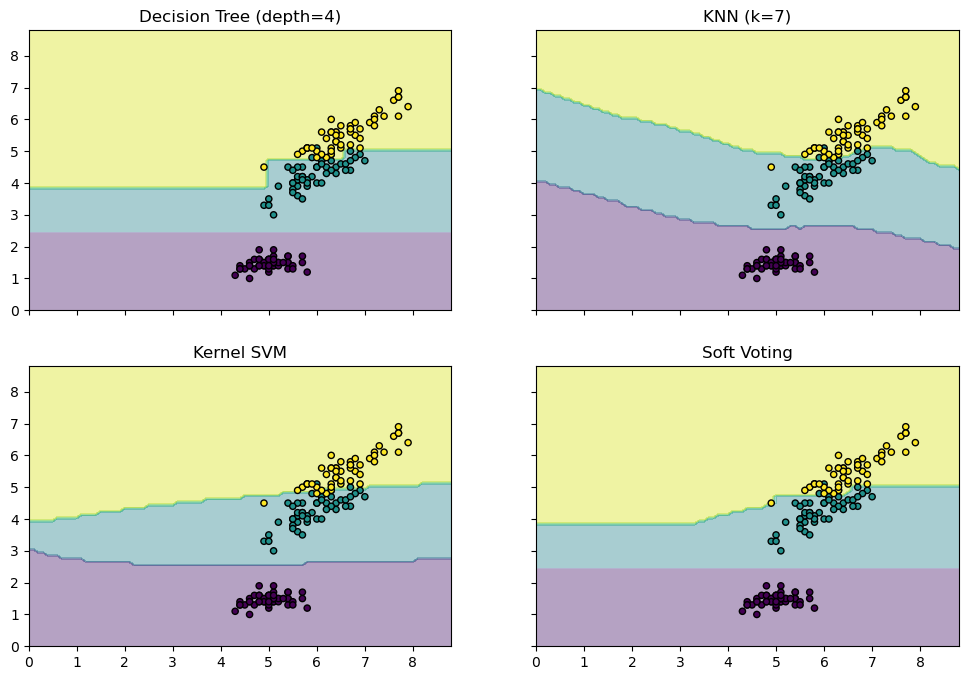

In [277]:
f, axarr = plt.subplots(2, 2, sharex = 'col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, vote_model],
                          ['Decision Tree (depth=4)', 'KNN (k=7)',
                           "Kernel SVM", 'Soft Voting']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z= Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=.4)
  axarr[idx[0], idx[1]].scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 투표 기반 회귀 (Voting Regressor)

* 서로 다른 모델의 예측 값의 평균을 사용

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [103]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators=[('linear', model1), ('gbr', model2), ('rfr', model3)],
    weights=[1,1,1]
)

In [104]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, boston.data, boston.target, cv=5)
  print("R2: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), model_name))

R2: 0.35 (+/- 0.38) [LinearRegression]
R2: 0.67 (+/- 0.17) [GradientBoostingRegressor]
R2: 0.62 (+/- 0.20) [RandomForestRegressor]
R2: 0.66 (+/- 0.20) [VotingRegressor]


### 회귀식 시각화

In [144]:
x = boston.data[:, 0].reshape(-1, 1)
y = boston.target

In [145]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators=[('linear', model1), ('gbr', model2), ('rfr', model3)],
    weights=[1,1,1]
)

model1 = model1.fit(x, y)
model2 = model2.fit(x, y)
model3 = model3.fit(x, y)
vote_model = vote_model.fit(x, y)

NameError: name 'VotingRegressor' is not defined

In [107]:
x_min, x_max = x.min()-1, x.max() + 1
xx= np.arange(x_min-1, x_max+1, .1)

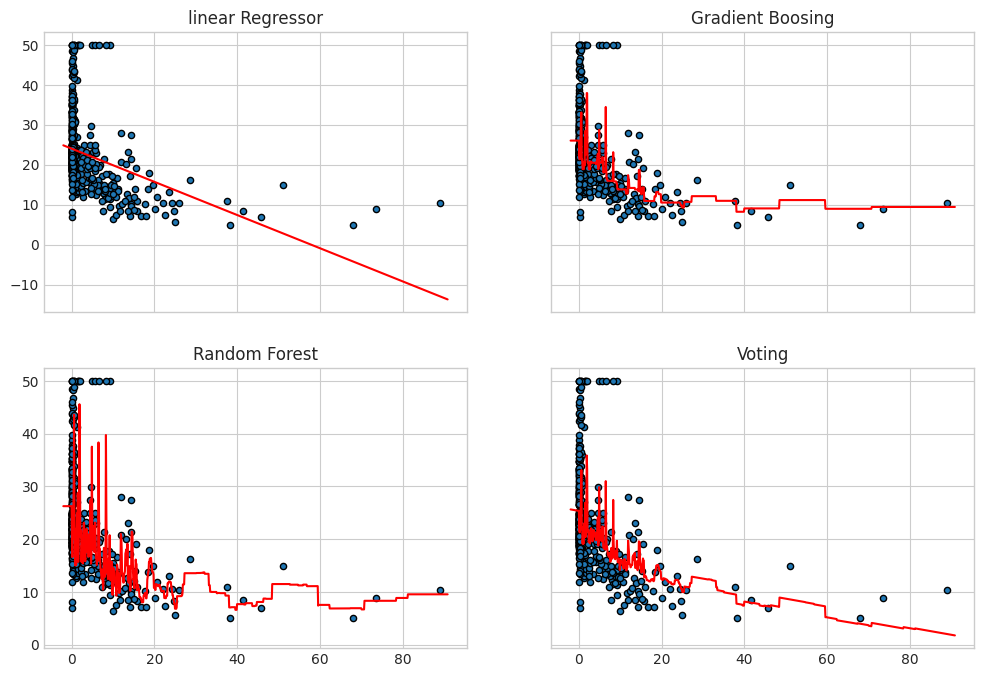

In [108]:
f, axarr = plt.subplots(2, 2, sharex = 'col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, vote_model],
                          ['linear Regressor', 'Gradient Boosing', 'Random Forest', 'Voting']):
  Z = model.predict(xx.reshape(-1,1))

  axarr[idx[0], idx[1]].plot(xx, Z, c='r')
  axarr[idx[0], idx[1]].scatter(x, y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 스택 일반화 (Stacked Generalization)

- 각 모델의 예측 값을 최종 모델의 입력으로 사용
- 모델의 편향을 줄이는데 효과적

### 스택 회귀

In [279]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [280]:
estimators = [('ridge', Ridge()),
              ('lasso', Lasso()),
              ('svr', SVR())]

In [281]:
reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators = estimators,
        final_estimator = GradientBoostingRegressor()
    )
)

In [282]:
cross_val = cross_validate(
    estimator = reg,
    X=boston.data, y = boston.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.10127091407775879
avg score time: 0.004817581176757813
avg test score: 0.3193752889374885


#### 회귀식 시각화

In [283]:
x = boston.data[:, 0].reshape(-1, 1)
y = boston.target

In [284]:
model1 = Ridge()
model2 = Lasso()
model3 = SVR()
reg = StackingRegressor(
        estimators = estimators,
        final_estimator = GradientBoostingRegressor())

model1 = model1.fit(x, y)
model2 = model2.fit(x, y)
model3 = model3.fit(x, y)
reg = reg.fit(x, y)

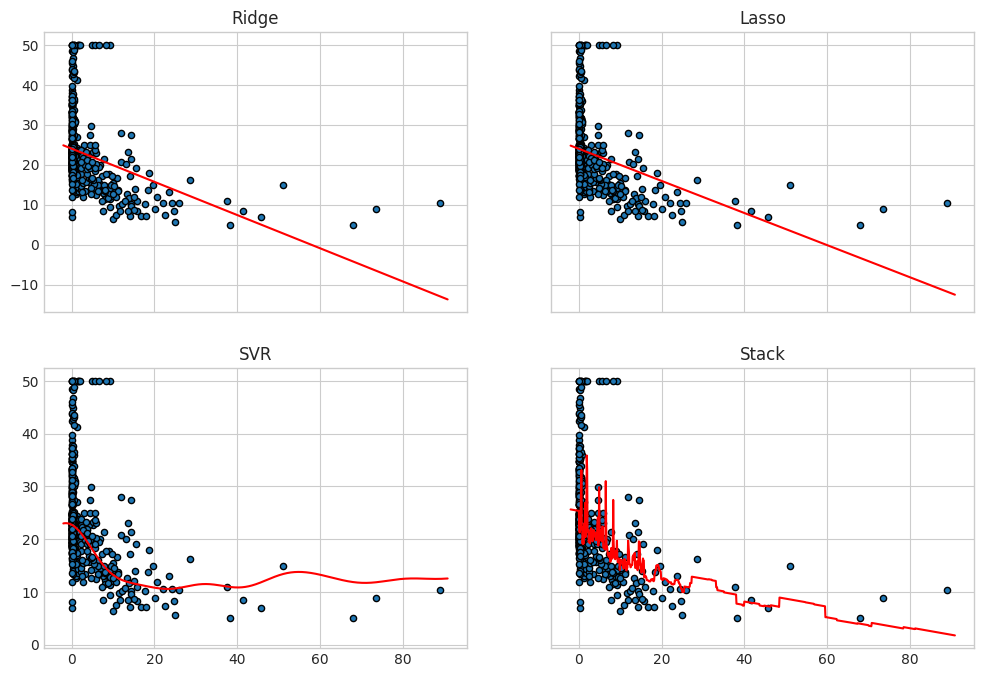

In [115]:
f, axarr = plt.subplots(2, 2, sharex = 'col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, vote_model],
                          ['Ridge', 'Lasso', 'SVR', 'Stack']):
  Z = model.predict(xx.reshape(-1,1))

  axarr[idx[0], idx[1]].plot(xx, Z, c='r')
  axarr[idx[0], idx[1]].scatter(x, y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### 스택 분류

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [117]:
estimators = [('logistic', LogisticRegression(max_iter=10000)),
              ('svc', SVC()),
              ('navie', GaussianNB())]

In [118]:
clf = StackingClassifier(
        estimators = estimators,
        final_estimator = RandomForestClassifier()
    )

In [119]:
cross_val = cross_validate(
    estimator = clf,
    X=iris.data, y = iris.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.29865250587463377
avg score time: 0.014280176162719727
avg test score: 0.9666666666666666


#### 결정 경계 시각화

In [120]:
x = iris.data[:, [0, 2]]
y = iris.target

In [121]:
model1 = LogisticRegression(max_iter=10000)
model2 = SVC()
model3 = GaussianNB()
stack = StackingClassifier(
    estimators = estimators,
    final_estimator = RandomForestClassifier()
)

model1 = model1.fit(x, y)
model2 = model2.fit(x, y)
model3 = model3.fit(x, y)
stack = stack.fit(x, y)

In [122]:
x_min, x_max = x.min()-1, x.max() + 1
y_min, y_max = x.min()-1, x.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                   np.arange(y_min, y_max, .1))

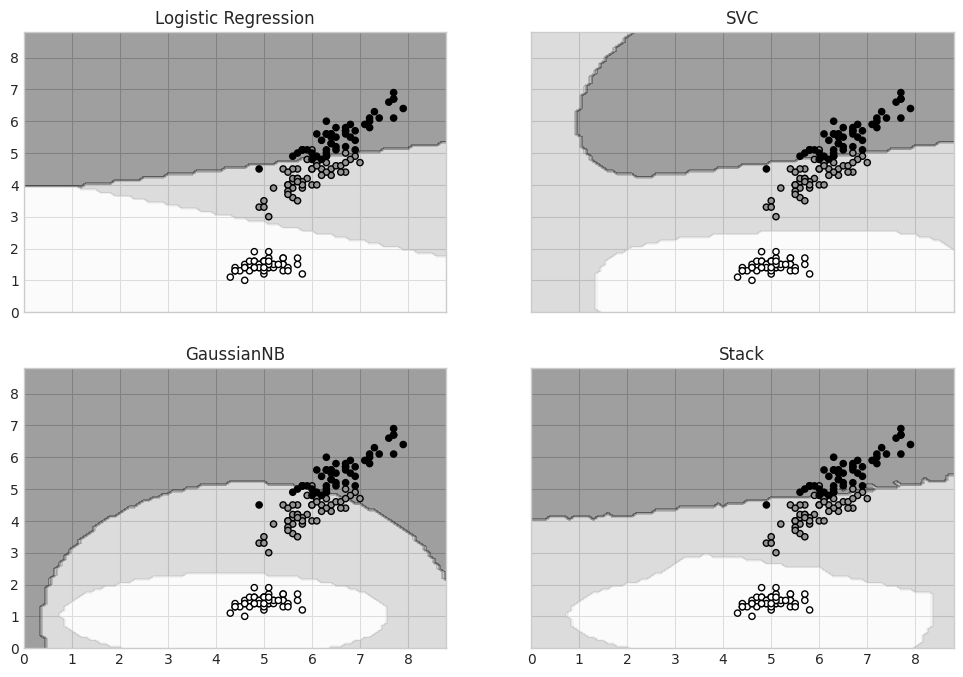

In [123]:
f, axarr = plt.subplots(2, 2, sharex = 'col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, stack],
                          ['Logistic Regression', 'SVC', "GaussianNB", 'Stack']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z= Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=.4)
  axarr[idx[0], idx[1]].scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()